In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import numpy.linalg as npl
from scipy.optimize import minimize
import math as math
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
import csv
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import griddata
from scipy import interpolate
from scipy.stats import gamma, halfnorm
from tqdm import tqdm
import corner
import emcee
from emcee.moves import WalkMove,DEMove
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from emcee.moves import GaussianMove
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
x = np.array([0.04330127006913202,	
0.04999999999981704	
,0.05873678649902327	
,0.07500000037654297	
,0.09058666578581276	
,0.09914450489134946	
,0.11646857028453979	
,0.12990381056731237	
,0.14871691421859828	
,0.15867073038481103	
,0.18262842855923792	
,0.19833833607688725	
,0.22500000000006706	
,0.24748737341553034	
,0.2739426430539203
,0.29743345953905714	
,0.3233578363783551		
,0.3535533906864989	
,0.39657794465537494	
,0.4461501516094344	])
x.shape

y = np.array([
-3.2146335541767
,-3.0602709391830
,-2.6509545283382
,-2.9492265921745
,-3.0200801823019
,-2.9411713554349
,-2.5763799817693
,-2.6946482827198
,-2.6368506172384
,-2.5997375497890
,-2.5386880548195
,-2.5554153237870
,-2.2042359990242
,-2.5509059870583
,-2.18554209191491
,-2.5087712715312
,-2.30149412707814
,-2.06315817953411
,-1.9774563917098
,-2.05421840513918
])
y.shape


errory = np.array([0.388486470951241	
,0.3071857349321623	
,0.2423094200928193	
,0.31611288952165095	
,0.453150405666618	
,0.23465308110818706	
,0.294583703960543
,0.15428402950755293	
,0.31391653188986623	
,0.32015214291506044	
,0.42569821558288057	
,0.20276712434154254	
,0.2750805003236527	
,0.28325194395516773	
,0.3061740109613511	
,0.19633369858334992	
,0.2550522222270657	
,0.13260762482205846	
,0.21472741090716863	
,0.20817854715046846	
])
errory.shape

xtrain, xtest, ytrain, ytest,etrain,etest = train_test_split(x, y,errory, test_size=0.5,shuffle = True,random_state = 25,)
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

[[-2.55090599]
 [-2.55541532]
 [-2.65095453]
 [-2.53868805]
 [-2.57637998]
 [-1.97745639]
 [-2.30149413]
 [-3.21463355]
 [-2.94922659]
 [-2.69464828]]
[[-2.2813584 ]
 [-2.36617597]
 [-3.03638354]
 [-2.43640628]
 [-2.85013483]
 [-2.07625049]
 [-2.25232514]
 [-3.03055078]
 [-3.01725403]
 [-2.76778802]]


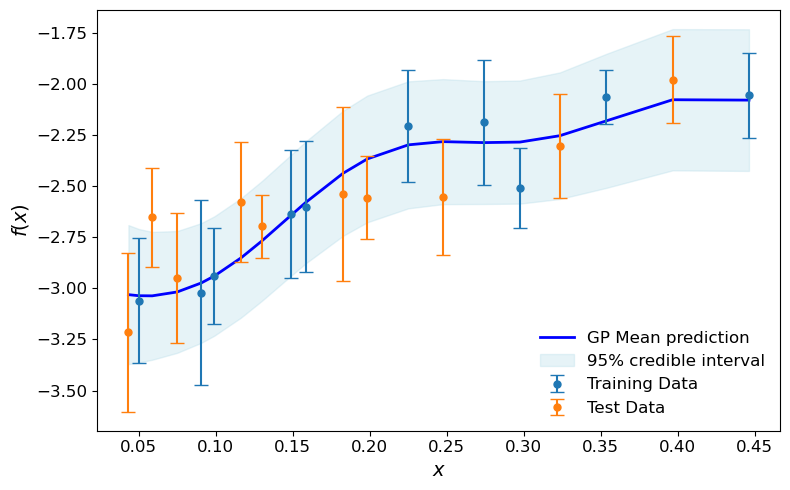

In [3]:
boundsl = ((1e-4, 10))  
initl = 1
initvar = 1.0
varbounds = (1e-20, 10)
noiselvl = 1
noiselvlbounds = (1e-20, 10)

kernel = C(constant_value=initvar, constant_value_bounds=varbounds) * \
         RBF(length_scale=initl, length_scale_bounds=boundsl) + \
         WhiteKernel(noiselvl, noise_level_bounds=noiselvlbounds)

gpr1 = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=20, random_state=42)
gpr1.fit(xtrain, ytrain)
y_pred, sigma = gpr1.predict(x.reshape(-1, 1), return_std=True)
mean_test,std_test = gpr1.predict(xtest.reshape(-1,1),return_std=True)
ytest
print(ytest)
print(mean_test.reshape(-1,1))

# Plotting GPR result
plt.figure(figsize=(8, 5))  # Same size

# GP mean prediction
plt.plot(x, y_pred, 'b-', linewidth=2, label="GP Mean prediction")

# Error bars for training and test data
plt.errorbar(xtrain.ravel(), ytrain.ravel(), yerr=etrain.ravel(), fmt='o', capsize=5,
             markersize=5, label='Training Data')
plt.errorbar(xtest.ravel(), ytest.ravel(), yerr=etest.ravel(), fmt='o', capsize=5,
             markersize=5, label='Test Data')

# Credible interval
plt.fill_between(x.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, 
                 color="lightblue", alpha=0.3, label="95% credible interval")

# Axis labels and ticks
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$f(x)$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid, legend, layout
plt.grid(False)
plt.legend(fontsize=12, frameon=False)
plt.tight_layout()

# Save figure
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\GPRwhitekernel.png", dpi=300, bbox_inches='tight')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

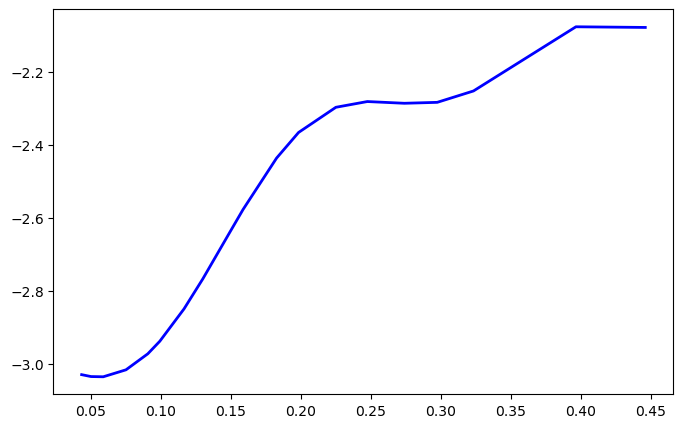

In [4]:
y_pred_test, sigma_test = gpr1.predict(xtest, return_std=True)

mse = mean_squared_error(ytest, y_pred_test)
rmse = np.sqrt(mse)

plt.figure(figsize=(8, 5))

plt.plot(x, y_pred, 'b-', linewidth=2)

for i in range(len(xtest)):
    plt.plot([xtest[i], xtest[i]], [ytest[i], y_pred_test[i]], linestyle="dashed", 
             color="red", alpha=0.8, linewidth=1.5)  

plt.scatter(xtest, ytest, color='red', marker='x', s=100, label='Test Data')

plt.fill_between(x.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, 
                 color="lightblue", alpha=0.3)

plt.plot([], [], linestyle="dashed", color="red", linewidth=1.5, label=r"$(y_i - \hat{y}_i$)")  
#plt.plot([], [], ' ', label=f'MSE: {mse:.3f}')
#plt.plot([], [], ' ', label=f'RMSE: {rmse:.3f}')
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$f(x)$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.legend(loc = 'upper left',fontsize=12, frameon=False)
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\MAE.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

print(rmse)


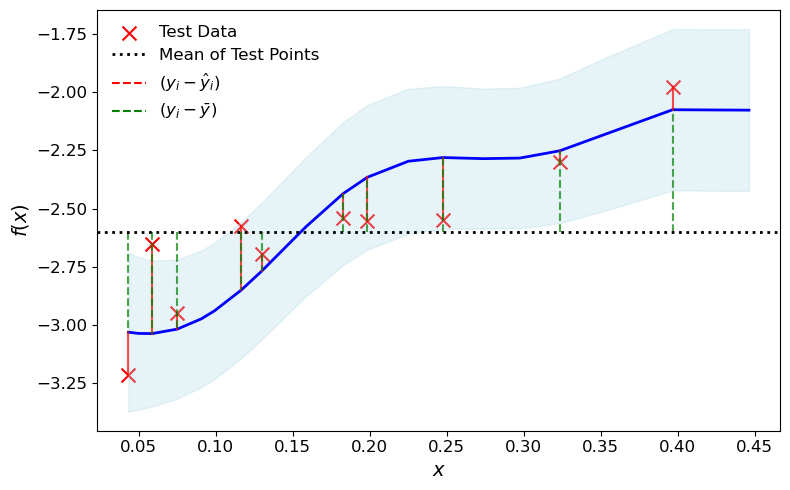

0.6001969547411332


In [ ]:
r2 = r2_score(ytest, y_pred_test)
N = len(ytest) 
p = 1 
r2_adjusted = 1 - (1 - r2) * ((N - 1) / (N - p - 1))

ytest_mean = np.mean(ytest)
plt.figure(figsize=(8, 5))
plt.plot(x, y_pred, 'b-', linewidth=2)

for i in range(len(xtest)):
    plt.plot([xtest[i], xtest[i]], [ytest[i], y_pred_test[i]], linestyle="solid", 
             color="red", alpha=0.7, linewidth=1.5) 

for i in range(len(xtest)):
    plt.plot([xtest[i], xtest[i]], [ytest_mean, y_pred_test[i]], linestyle="dashed", 
             color="green", alpha=0.7, linewidth=1.5)  

plt.scatter(xtest, ytest, color='red', marker='x', s=100, label='Test Data')

plt.fill_between(x.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, 
                 color="lightblue", alpha=0.3)

plt.axhline(y=ytest_mean, color='black', linestyle='dotted', linewidth=2, label='Mean of Test Points')


plt.plot([], [], linestyle="dashed", color="red", linewidth=1.5, label=r"$(y_i - \hat{y}_i$)") 
plt.plot([], [], linestyle="dashed", color="green", linewidth=1.5, label=r"$(y_i - \bar y$)") 
#plt.plot([], [], ' ', label=f'$R^2$: {r2:.3f}')
#plt.plot([], [], ' ', label=f'$\\bar R^2$: {r2_adjusted:.3f}')



plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$f(x)$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
plt.legend(fontsize=12, frameon=False)
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\r2.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
print(r2)

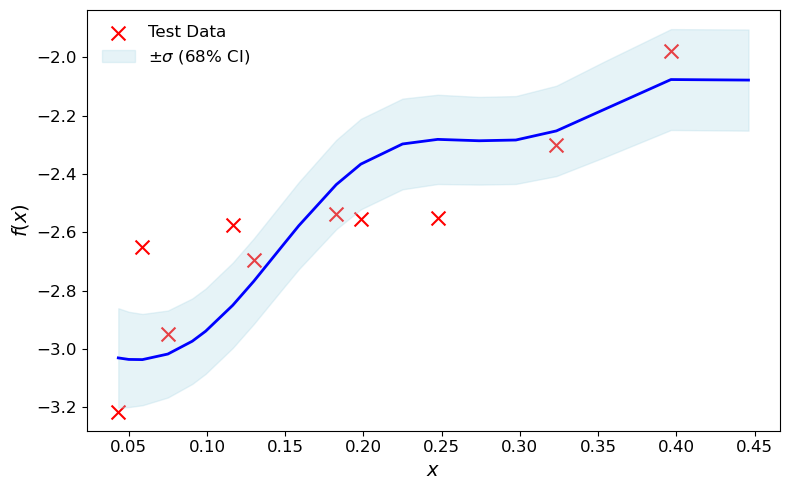

1.0912018436030446


In [ ]:
plt.figure(figsize=(8, 5))

fom = np.mean(np.abs(ytest - y_pred_test) / sigma_test)
plt.plot(x, y_pred, 'b-', linewidth=2)

plt.scatter(xtest, ytest, color='red', marker='x', s=100, label='Test Data')
plt.fill_between(x.ravel(), y_pred - sigma, y_pred + sigma, 
                 color="lightblue", alpha=0.3,label="$ \\pm \\sigma$ (68% CI)")

plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$f(x)$", fontsize=14)
#plt.plot([], [], ' ', label=f'FOM: {fom:.3f}')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.legend(loc = 'upper left',fontsize=12, frameon=False)
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\fom.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
print(fom)


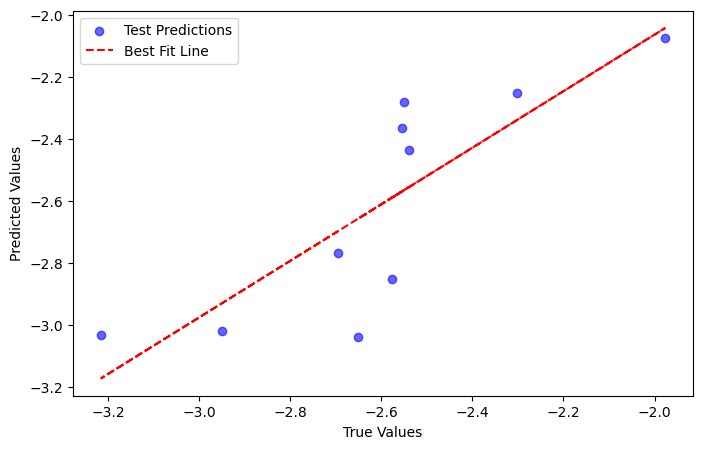

0.8246417406980414


In [143]:
pearson_corr, _ = pearsonr(ytest, y_pred_test)
p_value = pearson_corr  

plt.figure(figsize=(8, 5))
plt.scatter(ytest, y_pred_test, color='blue', alpha=0.6, label='Test Predictions')
m, b = np.polyfit(ytest, y_pred_test, 1) 
plt.plot(ytest, m * ytest + b, color='red', linestyle='--', label='Best Fit Line')
#plt.plot([], [], ' ', label=f'Pearson p: {p_value:.2f}')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(False)
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\pearson.png", dpi=300, bbox_inches='tight')
plt.show()
print(p_value)
